## WHAT IS AN OUTLIER?
Outlier is an observation that is numerically distant from the rest of the data or in a simple word it is the value which is out of the range.let’s take an example to check what happens to a data set with and data set without outliers.

As you can see, data set with outliers has significantly different mean and standard deviation. In the first scenario, we will say that average is 3.14. But with the outlier, average soars to 59.71. This would change the estimate completely.

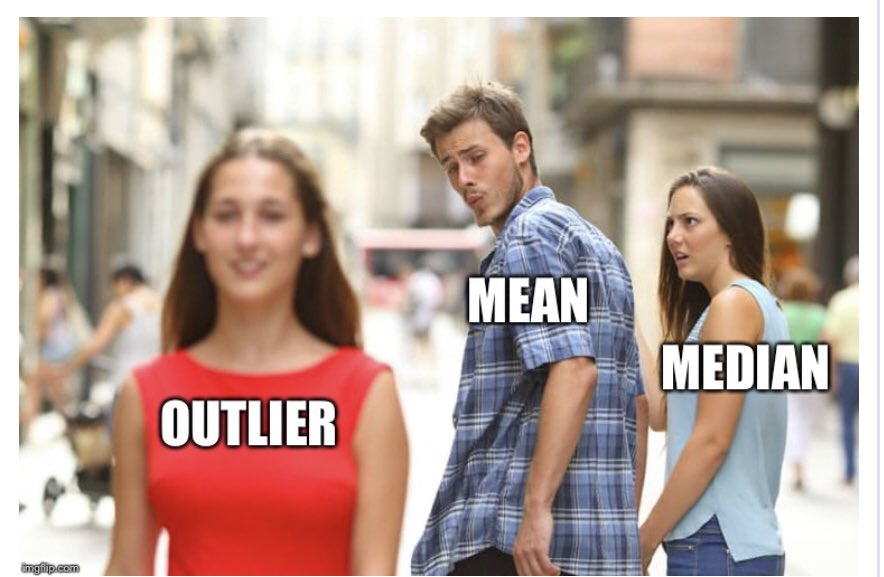

              The above meme makes you better understanding of how measures of central tendencies affected by outlier.

Lets take a real world example. In a company of 50 employees, 45 people having monthly salary of Rs.6,000, 5 senior employees having monthly salary of Rs.100000 each. If you calculate the average monthly salary of employees in the company is Rs.14,500, which will give you the wrong conclusion (mejority of employees have lesser than 14.5k salary). But if you take median salary, it is Rs.6000 which is more sense than the average.For this reason median is appropriate measure than mean. Here you can see the effect of outlier.

### CAUSE FOR OUTLIERS

* Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
* Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
* Measurement Error:- It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
* Natural Outlier:- When an outlier is not artificial (due to error), it is a natural outlier. Most of real world data belong to this category.

## OUTLIER DETECTION

Outlier can be of two types: Univariate and Multivariate. Above, we have discussed the example of univariate outlier. These outliers can be found when we look at distribution of a single variable. Multi-variate outliers are outliers in an n-dimensional space.

## DIFFERENT OUTLIER DETECTION TECHNIQUE.

1. Hypothesis Testing
2. Z-score method
3. Robust Z-score
4. I.Q.R method
5. Winsorization method(Percentile Capping)
6. DBSCAN Clustering
7. Isolation Forest
8. Visualizing the data

### HYPOTHESIS TESTING(GRUBBS TEST)

Grubbs' test is defined for the hypothesis: 

1. Ho:  There are no outliers in the data set
2. H1: There is exactly one outlier in the data set

The Grubbs' test statistic is defined as: 
Gcalculated=max∣∣Xi−X¯¯¯¯¯∣∣SD 

with X¯¯¯¯ and SD denoting the sample mean and standard deviation, respectively. 

In [9]:
import numpy as np
import scipy.stats as stats
x = np.array([12,13,14,19,21,23])
y = np.array([12,13,14,19,21,23,45])
def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers\n")
grubbs_test(x)
grubbs_test(y)

Grubbs Calculated Value: 1.4274928542926593
Grubbs Critical Value: 1.887145117792422
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers

Grubbs Calculated Value: 2.2765147221587774
Grubbs Critical Value: 2.019968507680656
From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers



### Z-SCORE METHOD

Using Z score method,we can find out how many standard deviations value away from the mean.

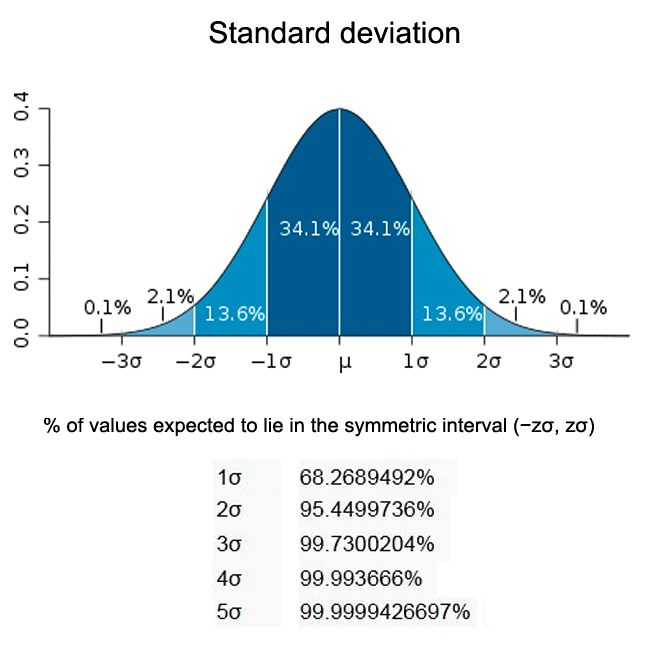

2. Z-SCORE METHOD
Using Z score method,we can find out how many standard deviations value away from the mean.

Figure in the left shows area under normal curve and how much area that standard deviation covers.
* 68% of the data points lie between + or - 1 standard deviation.
* 95% of the data points lie between + or - 2 standard deviation
* 99.7% of the data points lie between + or - 3 standard deviation

Z-score formula

$$Zscore=X−Mean/StandardDeviation$$

If the z score of a data point is more than 3 (because it cover 99.7% of area), it indicates that the data value is quite different from the other values. It is taken as outliers

In [11]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [22]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
out = []
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df:
        z = (i-m)/sd
        if np.abs(z)>3:
            out.append(i)
    print("Outliers",out)
Zscore_outlier(train['LotArea'])

Outliers [50271, 159000, 215245, 164660, 53107, 70761, 53227, 46589, 115149, 53504, 45600, 63887, 57200]


### IQR METHOD

In this method by using Inter Quartile Range(IQR), we detect outliers. IQR tells us the variation in the data set.Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR treated as outliers

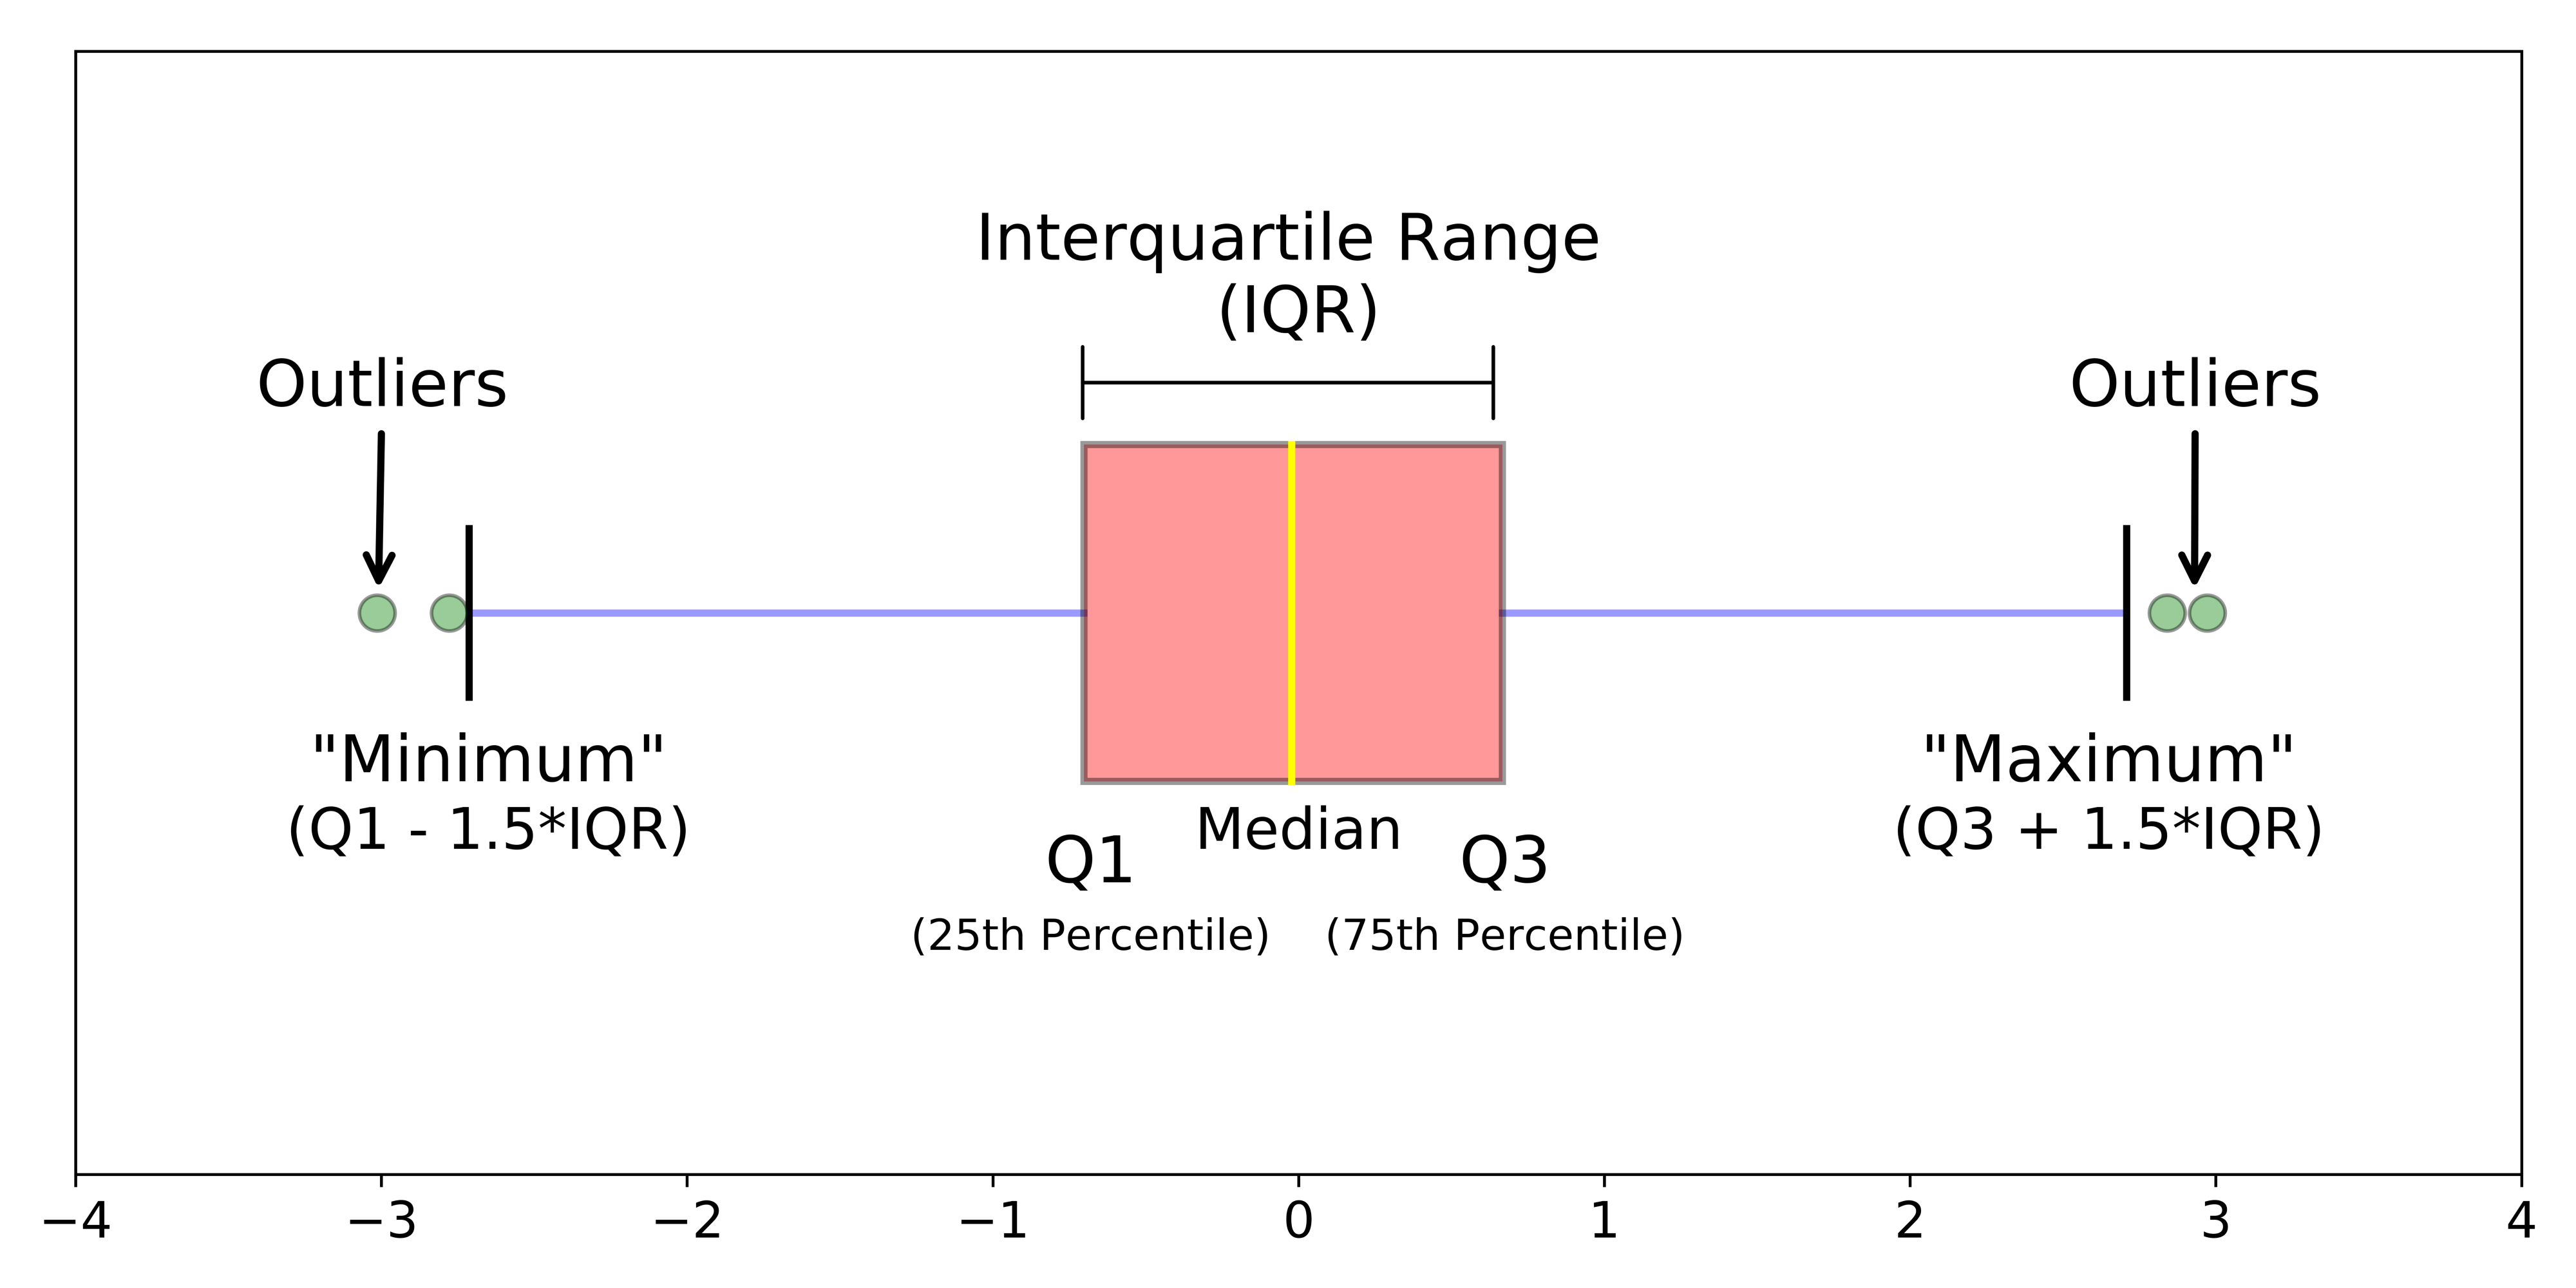

* Q1 represents the 1st quartile/25th percentile of the data.
* Q2 represents the 2nd quartile/median/50th percentile of the data.
* Q3 represents the 3rd quartile/75th percentile of the data.
* (Q1–1.5*IQR) represent the smallest value in the data set and (Q3+1.5*IQR) represnt the largest value in the data set.

In [17]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(train['LotArea'])

Outliers: [50271, 19900, 21000, 21453, 19378, 31770, 22950, 25419, 159000, 19296, 39104, 19138, 18386, 215245, 164660, 20431, 18800, 53107, 34650, 22420, 21750, 70761, 53227, 40094, 32668, 21872, 21780, 25095, 46589, 20896, 18450, 21535, 26178, 115149, 21695, 53504, 21384, 28698, 45600, 17920, 25286, 27650, 24090, 25000, 1300, 21286, 1477, 21750, 29959, 18000, 23257, 17755, 35760, 18030, 35133, 32463, 18890, 24682, 23595, 17871, 36500, 63887, 20781, 25339, 57200, 20544, 19690, 21930, 26142]


###  WINSORIZATION METHOD(PERCENTILE CAPPING)

This method is similar to IQR method. If a value exceeds the value of the 99th percentile and below the 1st percentile of given values are treated as outliers.

In [23]:
train = pd.read_csv('titanic_train.csv')
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)
Winsorization_outliers(train['Fare'])

Outliers: [263.0, 263.0, 512.3292, 262.375, 263.0, 263.0, 512.3292, 512.3292, 262.375]


### VISUALIZING THE DATA

Data visualization is useful for data cleaning, exploring data, detecting outliers and unusual groups, identifying trends and clusters etc. Here the list of data visualization plots to spot the outliers.

1. Box and whisker plot (box plot).
2. Scatter plot.
3. Histogram.
4. Distribution Plot.
5. QQ plot.

C:\Users\faiem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


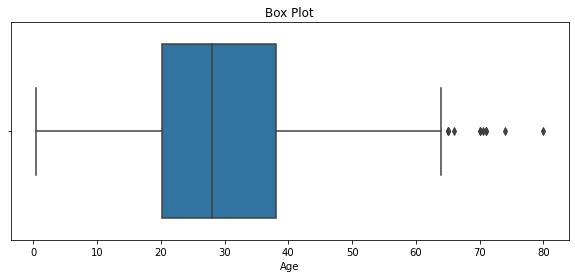

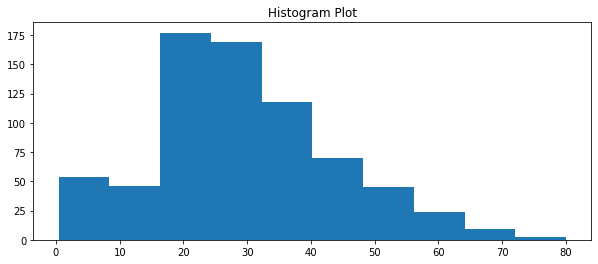

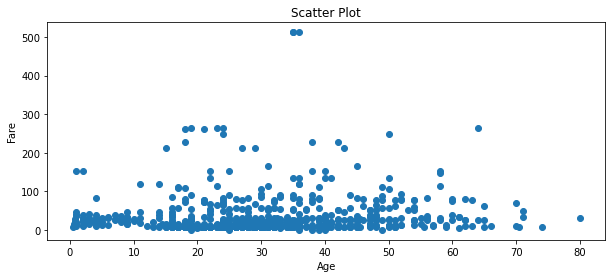

C:\Users\faiem\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


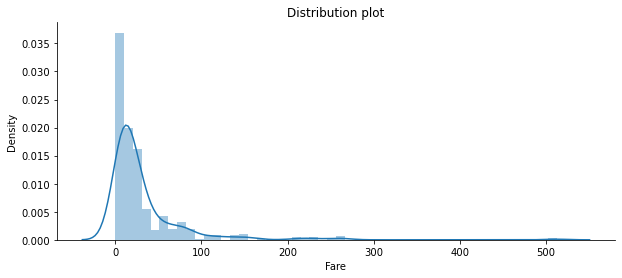

<Figure size 720x288 with 0 Axes>

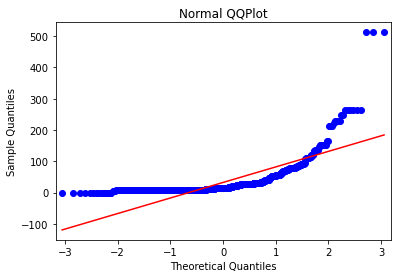

In [24]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
train = pd.read_csv('titanic_train.csv')
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(train['Age'])

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(train['Age'])

def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Age')
    ax.set_ylabel('Fare')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(train['Age'],train['Fare'])

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(train['Fare'])

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(train['Fare'])

#### After detecting the outlier we should remove\treat the outlier because it is a silent killer!! yes.

* Outliers badly affect mean and standard deviation of the dataset. These may statistically give erroneous results.
* It increases the error variance and reduces the power of statistical tests.
* If the outliers are non-randomly distributed, they can decrease normality.
* Most machine learning algorithms do not work well in the presence of outlier. So it is desirable to detect and remove outliers.
* They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.

With all these reasons we must be careful about outlier and treat them before build a statistical/machine learning model. There are some techniques used to deal with outliers.

1. Deleting observations.
2. Transforming values.
3. Imputation.
4. Separately treating

We delete outlier values if it is due to data entry error, data processing error or outlier observations are very small in numbers. We can also use trimming at both ends to remove outliers. But deleting the observation is not a good idea when we have small dataset.

C:\Users\faiem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


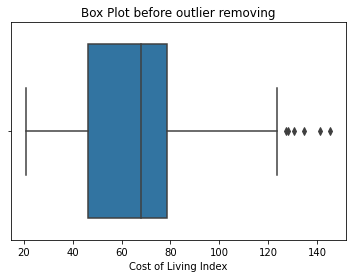

C:\Users\faiem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


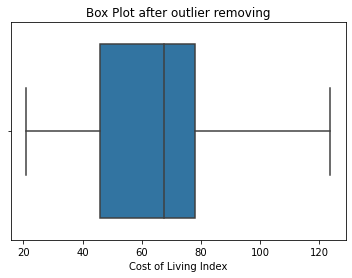

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
train = pd.read_csv('cost-of-living-2018.csv')
sns.boxplot(train['Cost of Living Index'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(train, 'Cost of Living Index')
sns.boxplot(train['Cost of Living Index'])
plt.title("Box Plot after outlier removing")
plt.show()

### TRANSFORMING VALUES:

Transforming variables can also eliminate outliers. These transformed values reduces the variation caused by extreme values.

1. Scalling
2. Log transformation
3. Cube Root Normalization
4. Box-Cox transformation

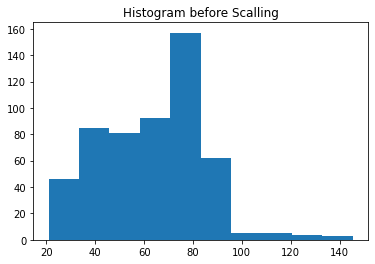

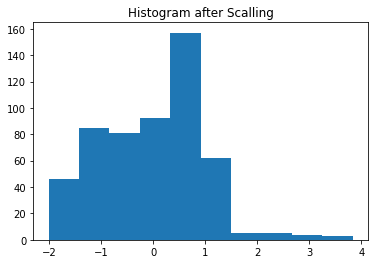

In [26]:
#Scalling
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
train = pd.read_csv('cost-of-living-2018.csv')
plt.hist(train['Cost of Living Index'])
plt.title("Histogram before Scalling")
plt.show()
scaler = preprocessing.StandardScaler()
train['Cost of Living Index'] = scaler.fit_transform(train['Cost of Living Index'].values.reshape(-1,1))
plt.hist(train['Cost of Living Index'])
plt.title("Histogram after Scalling")
plt.show()

C:\Users\faiem\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


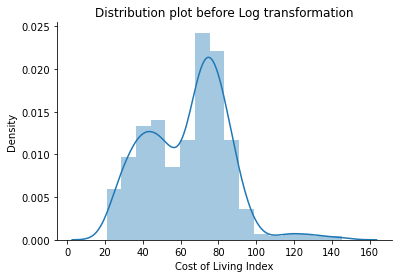

C:\Users\faiem\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


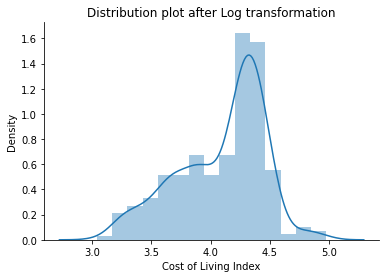

In [27]:
#Log Transformation
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
train = pd.read_csv('cost-of-living-2018.csv')
sns.distplot(train['Cost of Living Index'])
plt.title("Distribution plot before Log transformation")
sns.despine()
plt.show()
train['Cost of Living Index'] = np.log(train['Cost of Living Index'])
sns.distplot(train['Cost of Living Index'])
plt.title("Distribution plot after Log transformation")
sns.despine()
plt.show()

C:\Users\faiem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


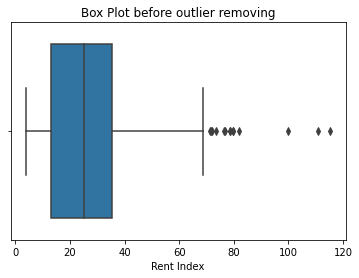

C:\Users\faiem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


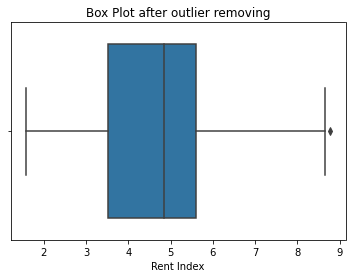

In [28]:
#Box-transformation
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy
train = pd.read_csv('cost-of-living-2018.csv')
sns.boxplot(train['Rent Index'])
plt.title("Box Plot before outlier removing")
plt.show()
train['Rent Index'],fitted_lambda= scipy.stats.boxcox(train['Rent Index'] ,lmbda=None)
sns.boxplot(train['Rent Index'])
plt.title("Box Plot after outlier removing")
plt.show()

### IMPUTATION

Like imputation of missing values, we can also impute outliers. We can use mean, median, zero value in this methods. Since we imputing there is no loss of data. Here median is appropriate because it is not affected by outliers.

C:\Users\faiem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


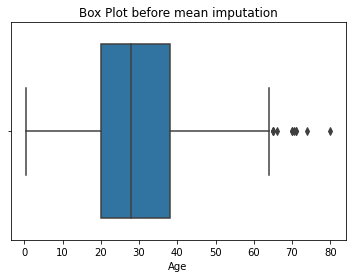

C:\Users\faiem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


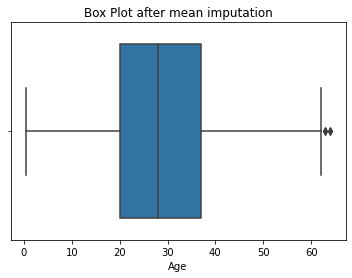

In [29]:
#mean imputation
import pandas as pd
import numpy as np
train = pd.read_csv('titanic_train.csv')
sns.boxplot(train['Age'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(train['Age'])
for i in train['Age']:
    if i > Upper_tail or i < Lower_tail:
            train['Age'] = train['Age'].replace(i, m)
sns.boxplot(train['Age'])
plt.title("Box Plot after mean imputation")
plt.show()

C:\Users\faiem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


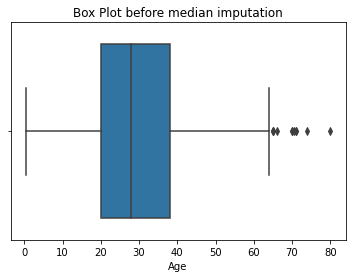

C:\Users\faiem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


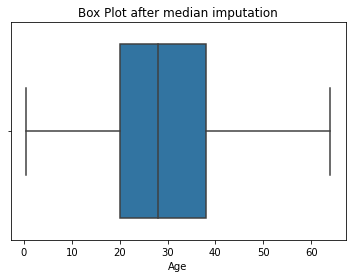

In [30]:
#median imputation
import pandas as pd
import numpy as np
train = pd.read_csv('titanic_train.csv')
sns.boxplot(train['Age'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(train['Age'])
for i in train['Age']:
    if i > Upper_tail or i < Lower_tail:
            train['Age'] = train['Age'].replace(i, med)
sns.boxplot(train['Age'])
plt.title("Box Plot after median imputation")
plt.show()

C:\Users\faiem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


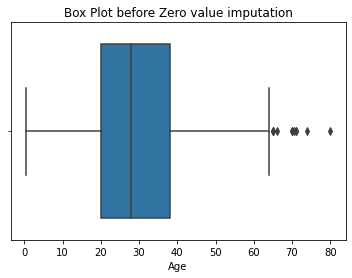

C:\Users\faiem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


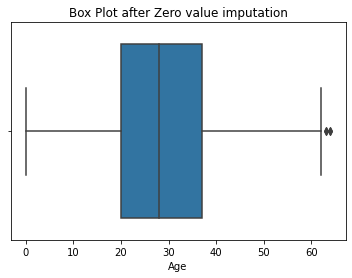

In [31]:
#Zero value imputation
import pandas as pd
import numpy as np
train = pd.read_csv('titanic_train.csv')
sns.boxplot(train['Age'])
plt.title("Box Plot before Zero value imputation")
plt.show()
q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in train['Age']:
    if i > Upper_tail or i < Lower_tail:
            train['Age'] = train['Age'].replace(i, 0)
sns.boxplot(train['Age'])
plt.title("Box Plot after Zero value imputation")
plt.show()

### SEPARATELY TREATING

If there are significant number of outliers and dataset is small , we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output. But this technique is tedious when the dataset is large.

## CONCLUSION

1. Median is best measure of central tendency when the data has outlier or skewed.
2. Winsorization Method or Percentile Capping is the better outlier detection technique the others.
3. Median imputation completely remove outlier.

Outlier is one of the major problem in machine learning. If you neglect the outlier result with bad performance of the model. In this kernel I'm try to cover almost all the topics related to outliers, outlier detection, outlier treatment techniques.